## Installation command for local Repository

In [1]:
%install '.package(path: "/home/param/GSOC19/github/swiftML")' swiftML

Installing packages:
	.package(path: "/home/param/GSOC19/github/swiftML")
		swiftML
With SwiftPM flags: []
Working in: /tmp/tmpckf4txr2/swift-install
Completed resolution in 0.39s
Compile Swift Module 'swiftML' (12 sources)
/home/param/GSOC19/github/swiftML/Sources/swiftML/KNeighborsClassifier.swift:128:13: warning: variable 'indices' was written to, but never read
        var indices: Tensor<Int32>
            ^

/home/param/GSOC19/github/swiftML/Sources/swiftML/SVC.swift:49:13: warning: initialization of immutable value 'd' was never used; consider replacing with assignment to '_' or removing it
        let d = x.shape[1]
        ~~~~^
        _
/home/param/GSOC19/github/swiftML/Sources/swiftML/SVC.swift:299:13: warning: initialization of immutable value 'n' was never used; consider replacing with assignment to '_' or removing it
        let n = a.shape[0]
        ~~~~^
        _
/home/param/GSOC19/github/swiftML/Sources/swiftML/SVC.swift:300:13: warning: initialization of immutable 

In [2]:
import TensorFlow
import swiftML

### Dataset

In [3]:
let features = Tensor<Float>([[10], [9], [2], [15], [10], [16], [11], [16]])
let labels = Tensor<Float>([[95], [80], [10], [50], [45], [98], [38], [93]])

## Linear Regression with least square method

In [4]:
let model = LinearRegression(gradientDescent: false)
model.fit(data: features, labels: labels)
let yPred = model.prediction(for: features)
print("Score: ", model.score(data: features, labels: labels))
print("Weights: ", model.weights)

Score:  0.4370948
Weights:  [[12.5846615],
 [ 4.5878954]]


In [5]:
import Python
print(Python.version)

2.7.15+ (default, Nov 27 2018, 23:36:35) 
[GCC 7.3.0]


### Visualization

In [6]:
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

let np = Python.import("numpy")

let plt = Python.import("matplotlib.pyplot")

In [7]:
let x = features.makeNumpyArray()
let y = labels.makeNumpyArray()
let yP = yPred.makeNumpyArray()

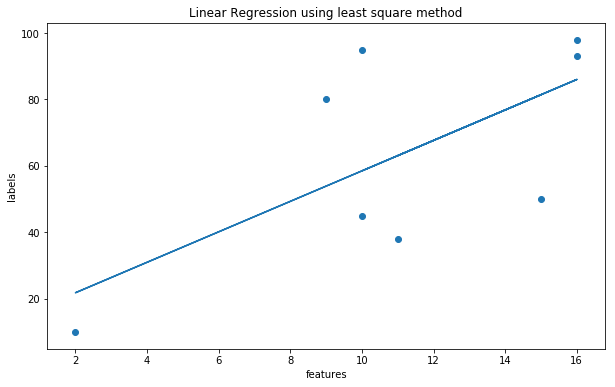

None


In [8]:
plt.figure(figsize: [10, 6])

plt.plot(x, yP)
plt.scatter(x, y)

plt.xlabel("features")
plt.ylabel("labels")
plt.title("Linear Regression using least square method")

plt.show()

## Linear Regression with Gradient Descent

In [9]:
let modelG = LinearRegression(gradientDescent: true, iterations: 100000, learningRate: 0.001)
modelG.fit(data: features, labels: labels)
let yPredG = modelG.prediction(for: features)
print("Score: ", modelG.score(data: features, labels: labels))
print("Weights: ",modelG.weights)

Score:  0.43709487
Weights:  [[ 12.58417],
 [4.5879345]]


In [10]:
let yPG = yPredG.makeNumpyArray()

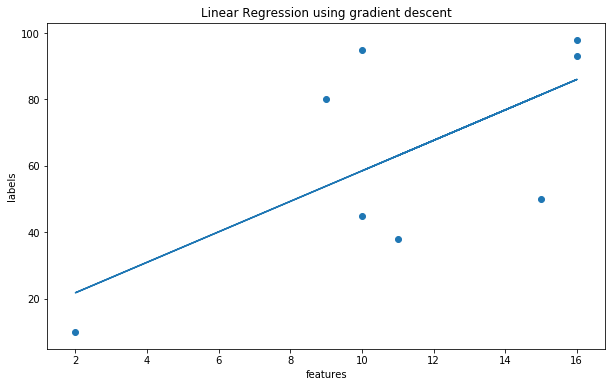

None


In [11]:
plt.figure(figsize: [10, 6])

plt.plot(x, yPG)
plt.scatter(x, y)

plt.xlabel("features")
plt.ylabel("labels")
plt.title("Linear Regression using gradient descent")

plt.show()